# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26924\3966174454.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset_clustering.csv')


In [3]:
# Memilih hanya kolom yang diinginkan
selected_columns = [
    "Category", "Size", "Date", "Status", "Fulfilment", "Style", 
    "SKU", "ASIN", "Courier Status", "Qty", "Amount", "B2B", "currency"
]

df = df[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Category        128975 non-null  object 
 1   Size            128975 non-null  object 
 2   Date            128975 non-null  object 
 3   Status          128975 non-null  object 
 4   Fulfilment      128975 non-null  object 
 5   Style           128975 non-null  object 
 6   SKU             128975 non-null  object 
 7   ASIN            128975 non-null  object 
 8   Courier Status  122103 non-null  object 
 9   Qty             128975 non-null  int64  
 10  Amount          121180 non-null  float64
 11  B2B             128975 non-null  bool   
 12  currency        121180 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 11.9+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print(f"Jumlah baris dan kolom : {df.shape}")

Jumlah baris dan kolom : (128975, 13)


In [5]:
print("\nTipe Data:")
print(df.dtypes)


Tipe Data:
Category           object
Size               object
Date               object
Status             object
Fulfilment         object
Style              object
SKU                object
ASIN               object
Courier Status     object
Qty                 int64
Amount            float64
B2B                  bool
currency           object
dtype: object


In [6]:
df.isnull().sum()

Category             0
Size                 0
Date                 0
Status               0
Fulfilment           0
Style                0
SKU                  0
ASIN                 0
Courier Status    6872
Qty                  0
Amount            7795
B2B                  0
currency          7795
dtype: int64

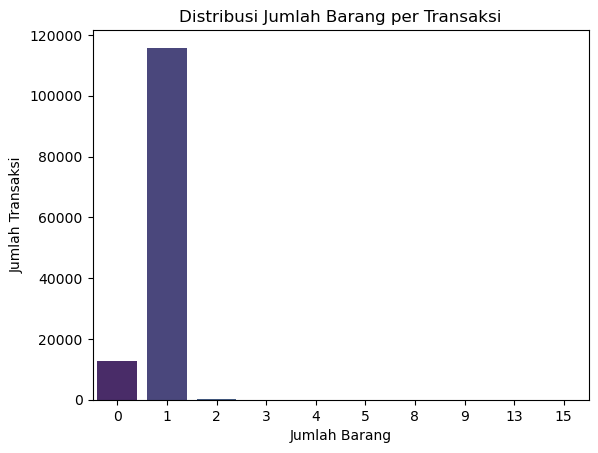

In [7]:
sns.countplot(x=df["Qty"], palette="viridis")
plt.title("Distribusi Jumlah Barang per Transaksi")
plt.xlabel("Jumlah Barang")
plt.ylabel("Jumlah Transaksi")
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


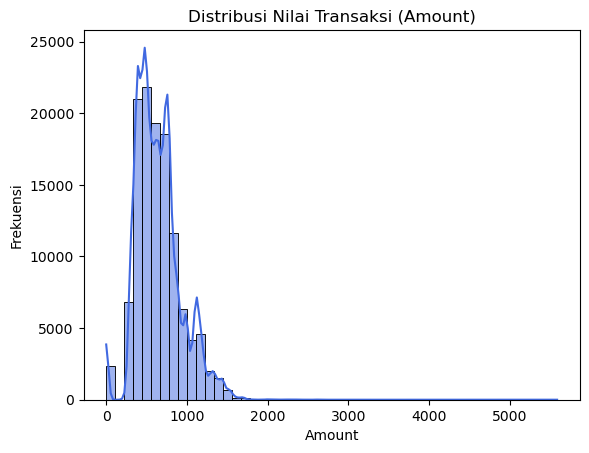

In [8]:
sns.histplot(df["Amount"], bins=50, kde=True, color="royalblue")
plt.title("Distribusi Nilai Transaksi (Amount)")
plt.xlabel("Amount")
plt.ylabel("Frekuensi")
plt.show()

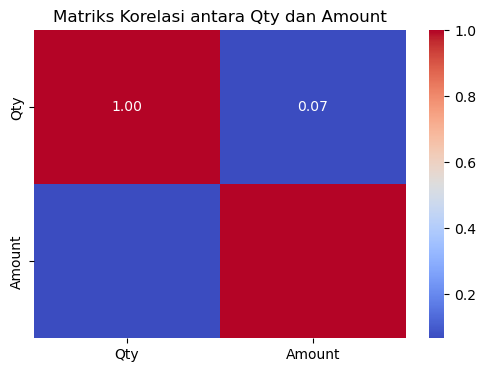

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Qty', 'Amount']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara Qty dan Amount')
plt.show()

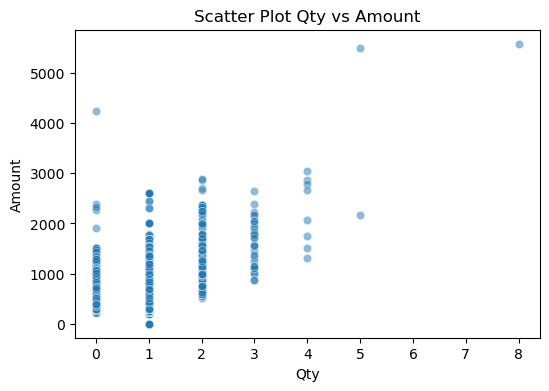

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Qty"], y=df["Amount"], alpha=0.5)
plt.title("Scatter Plot Qty vs Amount")
plt.xlabel("Qty")
plt.ylabel("Amount")
plt.show()

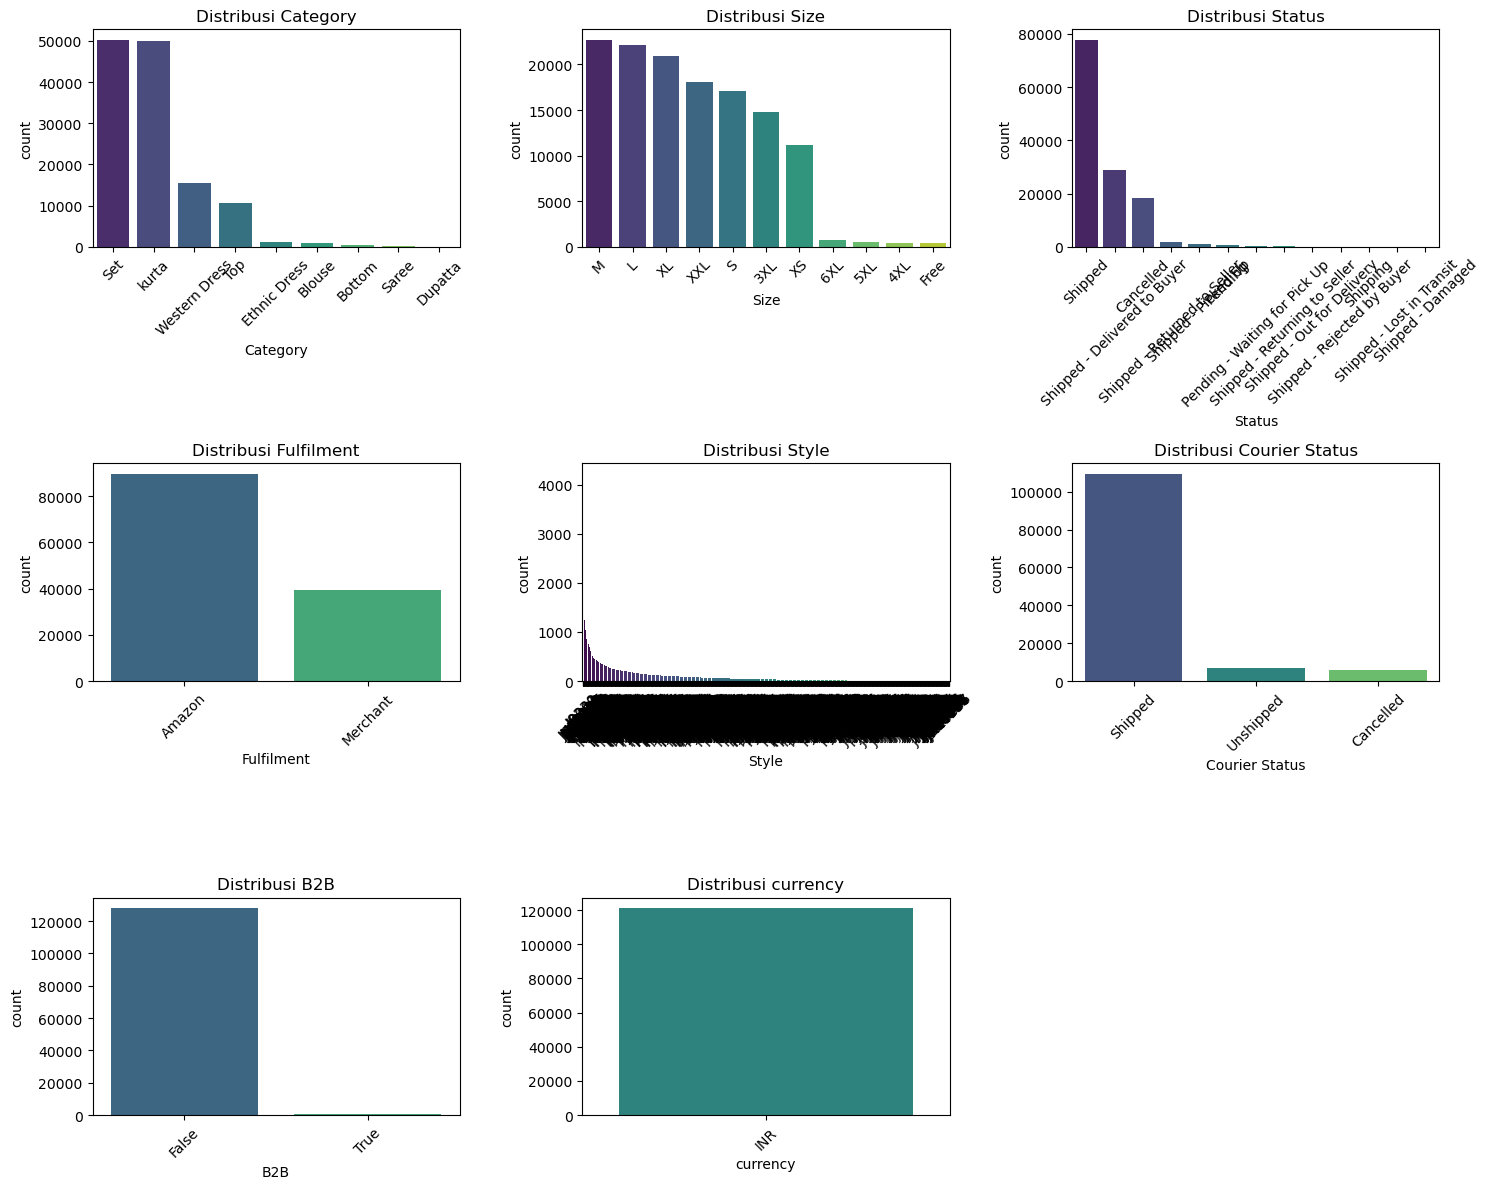

In [11]:
# Visualisasi variabel kategorikal
categorical_cols = ['Category', 'Size', 'Status', 'Fulfilment', 'Style', 'Courier Status', 'B2B', 'currency']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  # Buat grid 3x3 untuk menampilkan lebih banyak grafik
    sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index)
    plt.xticks(rotation=45)  # Putar label sumbu x jika terlalu panjang
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


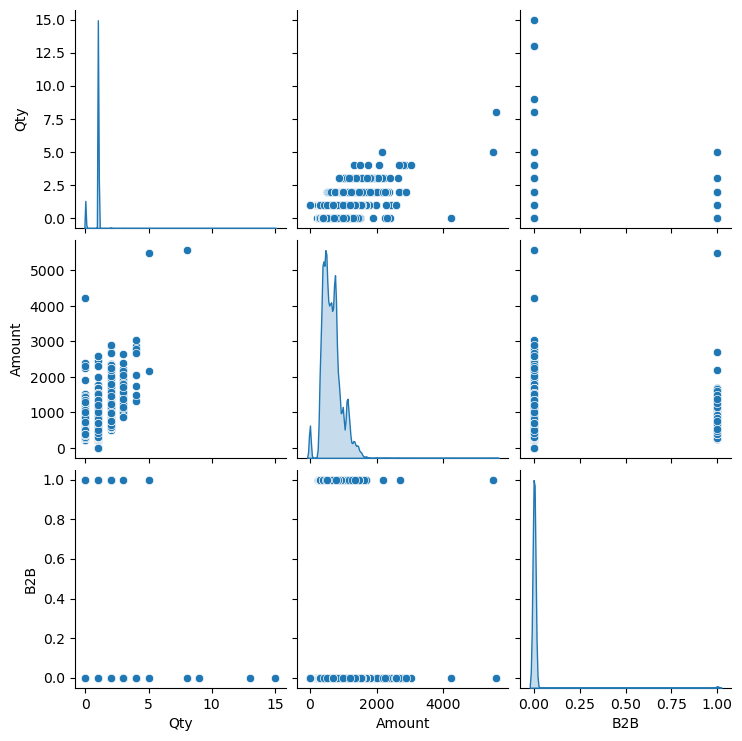

In [12]:
sns.pairplot(df, diag_kind="kde")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
df.dropna(subset=["Amount", "currency", "Courier Status"], inplace=True)
print(df.isnull().sum())
print(f"Jumlah baris dan kolom setelah menghapus missing values: {df.shape}")

Category          0
Size              0
Date              0
Status            0
Fulfilment        0
Style             0
SKU               0
ASIN              0
Courier Status    0
Qty               0
Amount            0
B2B               0
currency          0
dtype: int64
Jumlah baris dan kolom setelah menghapus missing values: (116044, 13)


In [14]:
df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

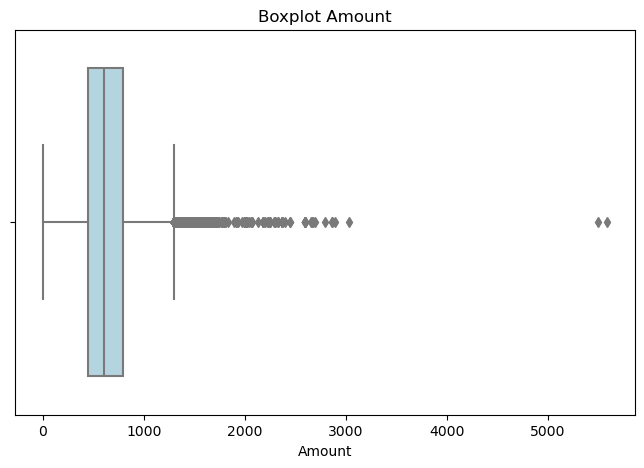

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount'], color="lightblue")
plt.title('Boxplot Amount')
plt.xlabel("Amount")
plt.show()

In [16]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df = df[df['Amount'] <= upper_bound]  # Hapus outlier di atas batas upper
print(f"Jumlah transaksi setelah menghapus outlier: {df.shape[0]}")

Jumlah transaksi setelah menghapus outlier: 112489


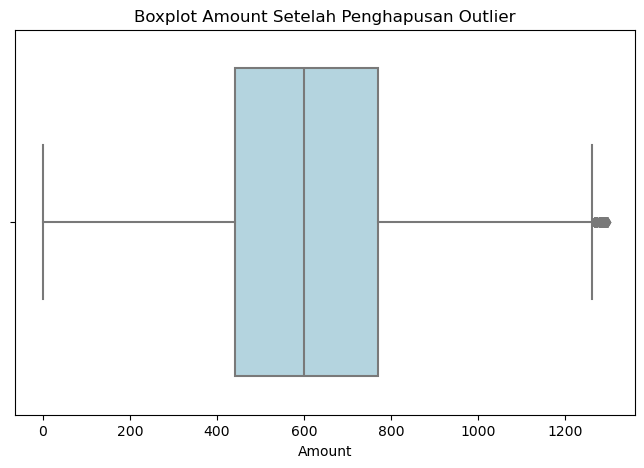

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount'], color="lightblue")
plt.title('Boxplot Amount Setelah Penghapusan Outlier')
plt.xlabel("Amount")
plt.show()

In [18]:
df_copy = df.copy()

In [19]:
scaler = StandardScaler()
df_copy['Amount_scaled'] = scaler.fit_transform(df_copy[['Amount']])

In [20]:
df_copy[['Category', 'Size', 'Status', 'Fulfilment', 'Style', 'Courier Status', 'B2B', 'currency']].nunique()

Category             9
Size                11
Status              12
Fulfilment           2
Style             1362
Courier Status       2
B2B                  2
currency             1
dtype: int64

In [21]:
# Label Encoding untuk fitur biner
label_cols = ['Fulfilment', 'Courier Status', 'B2B']
le = LabelEncoder()
for col in label_cols:
    df_copy[col] = le.fit_transform(df_copy[col])

# One-Hot Encoding
ohe_cols = ['Category', 'Size', 'Status']
df_copy = pd.get_dummies(df_copy, columns=ohe_cols, drop_first=True)  # drop_first=True untuk menghindari multikolinearitas

# Drop fitur currency (karena hanya ada 1 nilai unik)
df_copy.drop(columns=['currency'], inplace=True)

# Drop fitur Style (karena terlalu banyak nilai Unique)
df_copy.drop(columns=['Style'], inplace=True)

# Cek hasil encoding
df_copy.head()

,Date,Fulfilment,SKU,ASIN,Courier Status,Qty,Amount,B2B,Amount_scaled,Category_Bottom,...,Status_Pending - Waiting for Pick Up,Status_Shipped,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller
1,2022-04-30,1,JNE3781-KR-XXXL,B09K3WFS32,0,1,406.0,0,-0.884741,False,...,False,False,False,True,False,False,False,False,False,False
2,2022-04-30,0,JNE3371-KR-XL,B07WV4JV4D,0,1,329.0,1,-1.195850,False,...,False,True,False,False,False,False,False,False,False,False
4,2022-04-30,0,JNE3671-TU-XXXL,B098714BZP,0,1,574.0,0,-0.205958,False,...,False,True,False,False,False,False,False,False,False,False
5,2022-04-30,0,SET264-KR-NP-XL,B08YN7XDSG,0,1,824.0,0,0.804135,False,...,False,True,False,False,False,False,False,False,False,False
6,2022-04-30,0,J0095-SET-L,B08CMHNWBN,0,1,653.0,0,0.113231,False,...,False,True,False,False,False,False,False,False,False,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
# Tentukan jumlah cluster awal (misalnya 4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit model ke data yang sudah diproses
df_copy['Cluster'] = kmeans.fit_predict(df_copy[['Amount_scaled', 'Qty']])

# Cek jumlah data per cluster
df_copy['Cluster'].value_counts()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
3    39442
0    34911
2    24389
1    13747
Name: count, dtype: int64

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

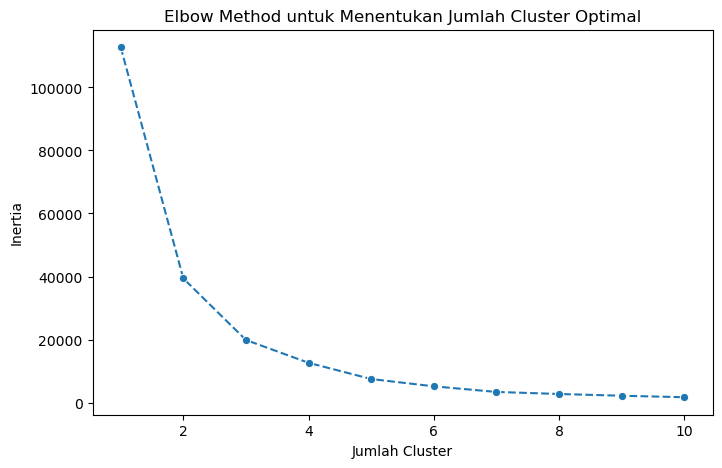

In [23]:
# Coba beberapa jumlah cluster (1-10)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_copy[['Amount_scaled', 'Qty']])
    inertia.append(kmeans.inertia_)  # Simpan inertia

# Plot Elbow Method
plt.figure(figsize=(8,5))
sns.lineplot(x=list(k_range), y=inertia, marker="o", linestyle="--")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()

In [24]:
silhouette_avg = silhouette_score(df_copy[['Amount_scaled', 'Qty']], kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5823


In [25]:
print(df_copy.columns)  # Pastikan fitur yang diperlukan ada
print(df_copy.info())  # Cek apakah semua data dalam bentuk numerik

Index(['Date', 'Fulfilment', 'SKU', 'ASIN', 'Courier Status', 'Qty', 'Amount',
       'B2B', 'Amount_scaled', 'Category_Bottom', 'Category_Dupatta',
       'Category_Ethnic Dress', 'Category_Saree', 'Category_Set',
       'Category_Top', 'Category_Western Dress', 'Category_kurta', 'Size_4XL',
       'Size_5XL', 'Size_6XL', 'Size_Free', 'Size_L', 'Size_M', 'Size_S',
       'Size_XL', 'Size_XS', 'Size_XXL', 'Status_Pending',
       'Status_Pending - Waiting for Pick Up', 'Status_Shipped',
       'Status_Shipped - Damaged', 'Status_Shipped - Delivered to Buyer',
       'Status_Shipped - Lost in Transit', 'Status_Shipped - Out for Delivery',
       'Status_Shipped - Picked Up', 'Status_Shipped - Rejected by Buyer',
       'Status_Shipped - Returned to Seller',
       'Status_Shipped - Returning to Seller', 'Cluster'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 112489 entries, 1 to 128974
Data columns (total 39 columns):
 #   Column                                Non

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

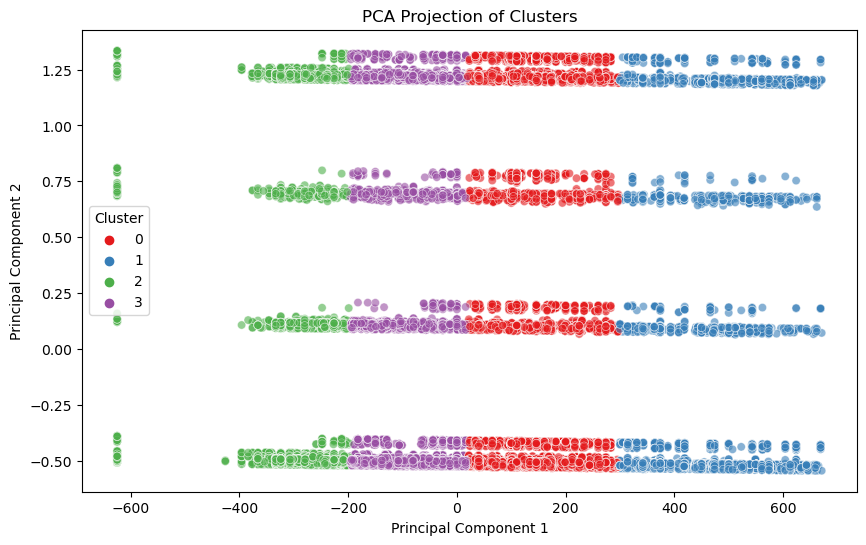

In [27]:
# Pilih hanya fitur numerik untuk PCA (exclude 'Cluster' karena itu label hasil)
features = df_copy.drop(columns=['Cluster', 'Date', 'SKU', 'ASIN'])

# Reduksi dimensi ke 2 dengan PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features)

# Simpan hasil PCA dalam DataFrame
df_copy['PCA1'] = pca_result[:, 0]
df_copy['PCA2'] = pca_result[:, 1]

# Scatter plot hasil PCA dengan cluster sebagai warna
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df_copy, alpha=0.6)
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [28]:
le_fulfilment = LabelEncoder()
le_fulfilment.fit(['Merchant', 'Amazon'])

le_courier = LabelEncoder()
le_courier.fit(['Shipped', 'Unshipped'])

# inverse transform
df_copy['Fulfilment'] = le_fulfilment.inverse_transform(df_copy['Fulfilment'])
df_copy['Courier Status'] = le_courier.inverse_transform(df_copy['Courier Status'])
df_copy['B2B'] = df_copy['B2B'].astype(bool)  # Karena awalnya boolean

# Cek hasilnya
df_copy[['Fulfilment', 'Courier Status', 'B2B']].head()

,Fulfilment,Courier Status,B2B
1,Merchant,Shipped,False
2,Amazon,Shipped,True
4,Amazon,Shipped,False
5,Amazon,Shipped,False
6,Amazon,Shipped,False


In [29]:
df['Cluster'] = df_copy['Cluster']

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 112489 entries, 1 to 128974
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        112489 non-null  object        
 1   Size            112489 non-null  object        
 2   Date            112489 non-null  datetime64[ns]
 3   Status          112489 non-null  object        
 4   Fulfilment      112489 non-null  object        
 5   Style           112489 non-null  object        
 6   SKU             112489 non-null  object        
 7   ASIN            112489 non-null  object        
 8   Courier Status  112489 non-null  object        
 9   Qty             112489 non-null  int64         
 10  Amount          112489 non-null  float64       
 11  B2B             112489 non-null  bool          
 12  currency        112489 non-null  object        
 13  Cluster         112489 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(1)

,Category,Size,Date,Status,Fulfilment,Style,SKU,ASIN,Courier Status,Qty,Amount,B2B,currency,Cluster
1,kurta,3XL,2022-04-30,Shipped - Delivered to Buyer,Merchant,JNE3781,JNE3781-KR-XXXL,B09K3WFS32,Shipped,1,406.0,False,INR,2
2,kurta,XL,2022-04-30,Shipped,Amazon,JNE3371,JNE3371-KR-XL,B07WV4JV4D,Shipped,1,329.0,True,INR,2
4,Top,3XL,2022-04-30,Shipped,Amazon,JNE3671,JNE3671-TU-XXXL,B098714BZP,Shipped,1,574.0,False,INR,3
5,Set,XL,2022-04-30,Shipped,Amazon,SET264,SET264-KR-NP-XL,B08YN7XDSG,Shipped,1,824.0,False,INR,0
6,Set,L,2022-04-30,Shipped,Amazon,J0095,J0095-SET-L,B08CMHNWBN,Shipped,1,653.0,False,INR,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [31]:
df_copy['Amount'] = scaler.inverse_transform(df_copy[['Amount_scaled']])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [32]:
# Melihat rata-rata tiap fitur berdasarkan cluster
df.groupby('Cluster').mean(numeric_only=True)

,Qty,Amount,B2B
Cluster,,,
0,1.002778,762.156369,0.008421
1,1.009093,1086.309740,0.007638
2,1.000000,326.310427,0.005740
3,1.000406,527.440140,0.006338


In [33]:
df.groupby('Cluster')['Category'].value_counts()

Cluster  Category     
0        Set              16854
         Western Dress    11234
         kurta             4201
         Top               1746
         Ethnic Dress       587
         Blouse             175
         Saree              110
         Bottom               4
1        Set              11967
         Western Dress     1088
         kurta              489
         Ethnic Dress       128
         Top                 60
         Saree               13
         Blouse               2
2        kurta            19943
         Top               2086
         Set               1147
         Western Dress      374
         Bottom             310
         Blouse             289
         Ethnic Dress       236
         Dupatta              3
         Saree                1
3        kurta            20097
         Set              11677
         Top               5967
         Western Dress     1150
         Blouse             371
         Ethnic Dress        80
         Bottom  

Tulis hasil interpretasinya di sini.
## 1. Cluster 0:
**Variabel numerik**
- Rata-rata Amount: 762.156369
- Rata-rata Qty: 1.002778

**Variabel kategorikal**
- Modus kategori: "Set" (kategori produk yang paling sering muncul)

**Analisis:**
- Cluster ini memiliki pelanggan dengan rata-rata jumlah pembelian yang cukup tinggi. Namun, nilai transaksi mereka lebih rendah dibanding Cluster 1, yang mungkin menunjukkan bahwa mereka lebih cenderung membeli produk dengan harga menengah.
- Strategi yang bisa diterapkan: Menawarkan diskon atau promo khusus untuk pembelian dalam jumlah banyak guna meningkatkan loyalitas pelanggan di cluster ini.

## 2. Cluster 1:
**Variabel numerik**
- Rata-rata Amount: 1086.309740
- Rata-rata Qty: 1.009093

**Variabel kategorikal**
- Modus kategori: "Set"

**Analisis:**
- Pelanggan di cluster ini memiliki nilai transaksi tertinggi. Hal ini bisa menunjukkan bahwa mereka membeli produk premium atau memiliki daya beli yang lebih besar.
- Strategi yang bisa diterapkan: Menawarkan rekomendasi produk serupa atau upselling ke kategori lain untuk meningkatkan nilai pembelian.

## 3. Cluster 2:
**Variabel numerik**
- Rata-rata Amount: 326.310427
- Rata-rata Qty: 1.000000

**Variabel kategorikal**
- Modus kategori: "Kurta"

**Analisis:**
- Cluster ini terdiri dari pelanggan dengan nilai transaksi paling kecil. Mereka cenderung membeli produk lebih murah atau melakukan pembelian dalam jumlah kecil.
- Strategi yang bisa diterapkan: Memberikan promo atau bundling produk agar pelanggan terdorong untuk membeli lebih banyak dalam satu transaksi.

## 4. Cluster 3:
**Variabel numerik**
- Rata-rata Amount: 527.440140
- Rata-rata Qty: 1.000406

**Variabel kategorikal**
- Modus kategori: "Kurta"

**Analisis:**
- Pelanggan dalam cluster ini memiliki nilai transaksi yang berada di antara Cluster 1 dan Cluster 2. Mereka masih bisa diarahkan untuk membeli produk dengan harga lebih tinggi melalui strategi cross-selling.
- Strategi yang bisa diterapkan: Melakukan personalisasi penawaran berdasarkan preferensi pelanggan, seperti diskon eksklusif untuk produk kategori "Top".

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
df_copy.to_csv('Dataset_inisiasi.csv', index=False)